In [194]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

# Analisis Exploratorio de Datos: Tricafone
Realizaremos un análisis de datos sobre un conjunto de eventos de web analytics de usuarios que visitaron www.trocafone.com, su plataforma de ecommerce de Brasil. Trocafone es un side to side Marketplace para la compra y venta de dispositivos electrónicos que se encuentra actualmente operando en Brasil y Argentina.

Este set de datos posee informacion de al rededor de 1000000 de eventos de Trocafone. Nuestro objetivo será realizar un análisis exploratorio sobre esa información, para intentar obtener algunos insights de de la misma.

In [195]:
eventos_2018 = pd.read_csv('./events.csv')

# Analizando propiedades especificas del set de datos
Para poder comenzar a orientar nuestro analisis comenzaremos a analizar algunas variables que nos interesan para aplicar en nuestros analisis. Comenzaremos con los tipos de eventos.

De esta forma obtenemos la cantidad de valores que hay para cada uno de los tipos de evento.

In [196]:
eventos_principales = eventos_2018['event']
eventos_principales.value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [197]:
#analizo la columna timestamp para entender su uso en el data set.
eventos_2018['timestamp'].head()

0    2018-05-31 23:38:05
1    2018-05-31 23:38:05
2    2018-05-31 23:38:09
3    2018-05-31 23:38:40
4    2018-05-29 13:29:25
Name: timestamp, dtype: object

In [198]:
# Dado que es de tipo 'objeto' creo una nueva columna copiando la informacion de la columna 'timestamp'
# y pasandola a tipo de dato 'datetime'.

eventos_2018['event_datetime'] = pd.to_datetime(eventos_2018['timestamp'])
# Creo una nueva columna obteniendo el mes, esto los usuaremos en visualizacion.
eventos_2018['month'] = eventos_2018['event_datetime'].dt.month

In [199]:
eventos_2018['month'].value_counts()

5    474949
6    281882
4    130008
3     77293
2     27886
1     19270
Name: month, dtype: int64

# Verificacion de Calidad de Datos

Verifico la cantidad de valores nulos.

In [200]:
eventos_2018.isnull().sum()

timestamp                         0
event                             0
person                            0
url                          928532
sku                          447450
model                        447004
condition                    447452
storage                      447452
color                        447452
skus                         789589
search_term                  962321
staticpage                  1007690
campaign_source              928492
search_engine                960331
channel                      923910
new_vs_returning             923910
city                         923910
region                       923910
country                      923910
device_type                  923910
screen_resolution            923910
operating_system_version     923910
browser_version              923910
event_datetime                    0
month                             0
dtype: int64

Se puede observar que gran parte de las columnas son en su mayoria datos nulos, sin embargo esto no es razon suficiente para descartarlas (las columnas), ya que si analisamos un poco los datos, se puede ver que no a todos los eventos les corresponden la misma informacion.
Por lo tanto habra que relacionar los datos, posiblemente a traves de merge  o joins de diferentes tablas.

# Linea Temporal

Veo entre que fechas exactas ocurren los eventos del dataset.

In [201]:
eventos_2018['event_datetime'].agg({'event_datetime':['min','max']})

event_datetime  min   2018-01-01 07:32:26
                max   2018-06-15 23:59:31
Name: event_datetime, dtype: datetime64[ns]

Aca puedo ver que los eventos ocurren durante los primeros 6 meses del 2018, pero del mes 6 (Junio) solo estan los primeros 16 dias, por lo que tengo la mitad de la informacion a comparacion de los otros meses.

# Analisis de eventos

In [202]:
grouped_events_per_month = eventos_2018.groupby(['month']).agg({'event':['count']})

In [203]:
 grouped_events_per_month.head(20)

,event
,count
month,
1,19270
2,27886
3,77293
4,130008
5,474949
6,281882


In [204]:
# agrupando usando multiples columnas
grouped_events_types_per_month = eventos_2018.groupby(['month','event']).agg({'event':['count']})

In [205]:
grouped_events_types_per_month.head(13)

event
                        count
month event                  
1     ad campaign hit    1702
      brand listing      1953
      checkout            331
      conversion           63
      generic listing    1721
      lead                 32
      search engine hit  1003
      searched products  1341
      staticpage          138
      viewed product     8851
      visited site       2135
2     ad campaign hit    2340
      brand listing      3101

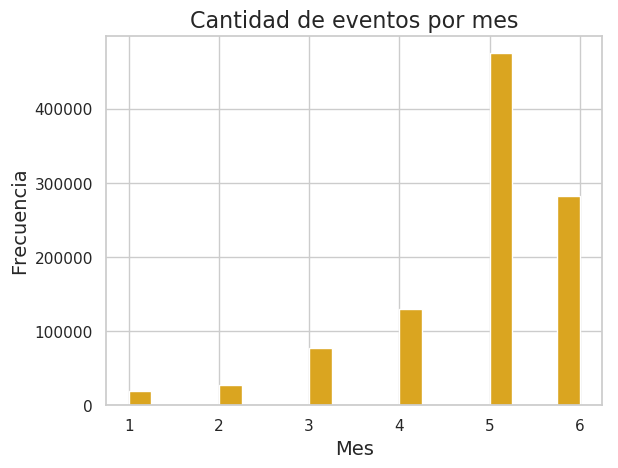

In [206]:

g = eventos_2018["month"].plot.hist(bins=20, color='goldenrod')
g.set_title("Cantidad de eventos por mes", fontsize=16)
g.set_xlabel('Mes', fontsize=14)
g.set_ylabel('Frecuencia', fontsize=14)
g

Se puede ver la cantidad de eventos a lo largo del año es creciente con una caida en Junio,esto no es una caida real en la cantidad de eventos,sino que es causa por lo que se vio previamente sobre que solo poseemos los datos de la mitad de Junio, por lo tanto si tenemos en cuenta eso, la cantidad de eventos en el mes de Junio seria cercana al doble, lo que tendria sentido con la curva creciente que vemos.

## Analisis de los tipos de evento y evolucion
A continuacion procedere a analizar la cantidad de cada tipo de eventos realizados y su evolucon a travez de los meses.

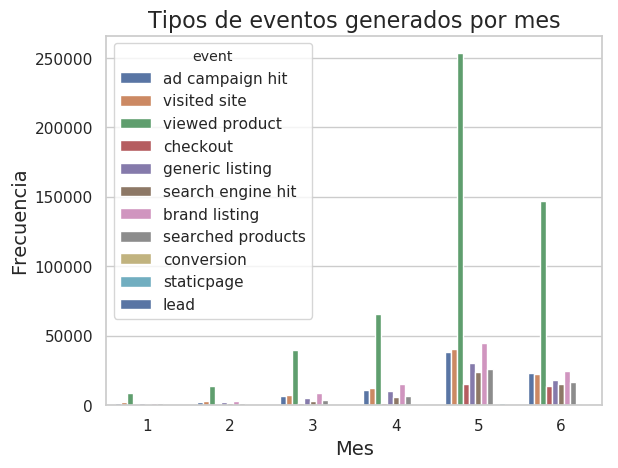

In [207]:
g = sns.countplot(x="month", hue="event", data=eventos_2018, palette="deep")
g.set_title("Tipos de eventos generados por mes", fontsize=16)
g.set_xlabel('Mes', fontsize = 14)
g.set_ylabel('Frecuencia', fontsize = 14)
g

Se puede observar que la reclacion entre cada tipo de evento se mantiene mes a mes, y que todos crecen simultaneamente.
Con una amplia diferencia entre el evento 'viewed_product, que conforma la gran parte de los eventos, y los otros eventos.
Por otro lado, los eventos con menos frecuencia son al parecer las: 'conversion' (ventas), 'staticpage' y 'leads'.

### Continuar....

queria pasar el plot de arriba a heatmap pero no me sale

for_heatmap = eventos_2018.pivot_table(index=['month'], columns=['event'],values='event',aggfunc='count')

# Analisis de Marketing

A continuacion filtrare algunas columnas que en general son informacion sobre el dispositivo del usuario, y algunas otras,que en su mayoria son NaN y no hacen diferencia al analisis que hare. Dado que voy a analizar la relacion entre entradas a traves de ads y diferentes tipos de evento esas columnas no las voy a necesitar.
Si voy a quedarme con algunas columnas que no creo necesitar, pero no las voy a borrar por si acaso las necesito en algo que no este teniendo en cuenta.

In [208]:
for_marketing = eventos_2018[['timestamp','event','person','url','model','condition','storage','campaign_source','search_engine','new_vs_returning','event_datetime','month']]

### Ads hits por empresa en cada mes

Quiero ver la evolucion de los hits de cada fuente de publicidad a traves de los meses, asique realizare un heatmap.

In [209]:
for_heatmap =  for_marketing[for_marketing['event'] == 'ad campaign hit'].groupby(['campaign_source','month']).size().unstack(fill_value=0).sort_values([5],ascending = False).iloc[:10,:]

Dado que la cantidad de servicios de publicidad eran demaciados y la mayoria no aportaban mucho al heatmap por la falta de 'ads hits' decidi descartar aquellos que durante el mes que mas se descato por el rendimiento (Mayo,5 ) tuvieros menos entradas, dado que ordene por la cantidad y tome los mejores 10.

In [210]:
for_heatmap

month,1,2,3,4,5,6
campaign_source,,,,,,
google,1023,1607,4382,6762,27115,17264
criteo,212,203,1038,1670,4174,2397
rtbhouse,136,274,717,1598,4122,1703
zanox,70,62,157,252,737,395
emblue,32,37,135,324,641,183
voxus,0,0,0,0,320,112
afilio,101,26,55,94,264,152
bing,16,11,52,53,255,97
rakuten,0,0,0,32,113,165


Text(46.25,0.5,'Tipo de evento')

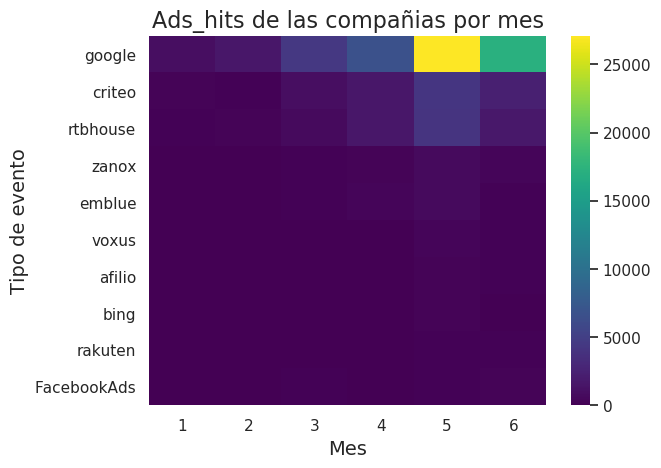

In [211]:
g = sns.heatmap(for_heatmap,  cmap="viridis")
g.set_title("Ads_hits de las compañias por mes", fontsize=16)
g.set_xlabel("Mes",fontsize=14)
g.set_ylabel("Tipo de evento", fontsize=14)

En el siguiente grafico se puede observar facilmente que las campañas publicitarias por las que mas usuarios igresan a la pagina son originadas por los servicios de Google, Criteo, y Rtbhouse, que claramente sobresaltan sobre los demas, y dentro de este grupo de 3, gogole es claramente la fuene de mas ingresos a la pagina.
Todos van aumentando conforme los meses avanzan y caen en el mes 6 pero esto es por lo que vimos previamente sobre los datos incompletos del mes de Junio.

## Correlacion Google ads vs ventas y checkouts

Quiero analizar la correlacion entre los eventos generados por ingresos de usuarios a traves de anuncios de google y los eventos generados por checkouts y conversiones.

In [212]:
hits_google = for_marketing[for_marketing['campaign_source'] == 'google']
conversions = for_marketing[for_marketing['event'] == 'conversion']
checkouts = for_marketing[for_marketing['event'] == 'checkout']

In [213]:
hits_google['day'] = hits_google['event_datetime'].dt.day

In [214]:
for_heatmap =  hits_google.groupby(['month','day']).size().unstack(fill_value=0)

Text(46.25,0.5,'Mes')

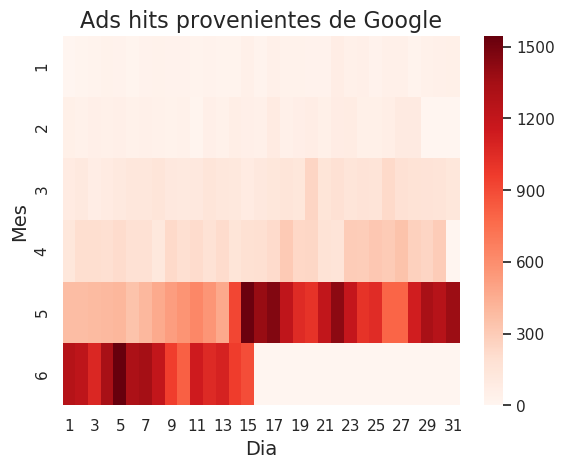

In [215]:
g = sns.heatmap(for_heatmap,  cmap="Reds")
g.set_title("Ads hits provenientes de Google", fontsize=16)
g.set_xlabel("Dia",fontsize=14)
g.set_ylabel("Mes", fontsize=14)

En este grafico se puede ver con mas detalle el cambio en la cantidad de 'ads hits' generados por google, que tambien se veia en el grafico anterior, tambien se puede ver mas facilmente porque el mes 6 tenia una bajada en la cantidad de eventos, dado que faltan los datos a partir del dia 16 en adelante.

A continuacion analizare con el mismo formato los eventos de ventas y checkouts, para ver las correlaciones entre la evolucion de cada uno.


REEESCRIBIR :::::
La cantidad de ventas es baja vs la cabtidad de eventos por ads hits o checkouts que hay en el set de datos por lo que una correlacion seria dificil,ya que como veremos mas adelante la cantidad de ventas de google es poco representativo sobre la cantidad de ads que esta tiene. 

Text(46.25,0.5,'Mes')

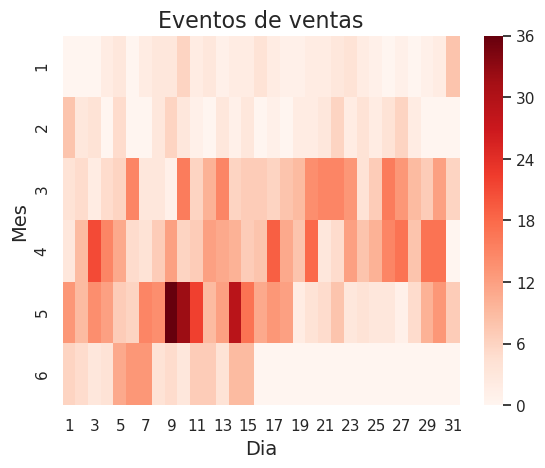

In [216]:
conversions['day'] = conversions['event_datetime'].dt.day
for_heatmap =  conversions.groupby(['month','day']).size().unstack(fill_value=0)

g = sns.heatmap(for_heatmap,  cmap="Reds")
g.set_title("Eventos de ventas", fontsize=16)
g.set_xlabel("Dia",fontsize=14)
g.set_ylabel("Mes", fontsize=14)

Text(46.25,0.5,'Mes')

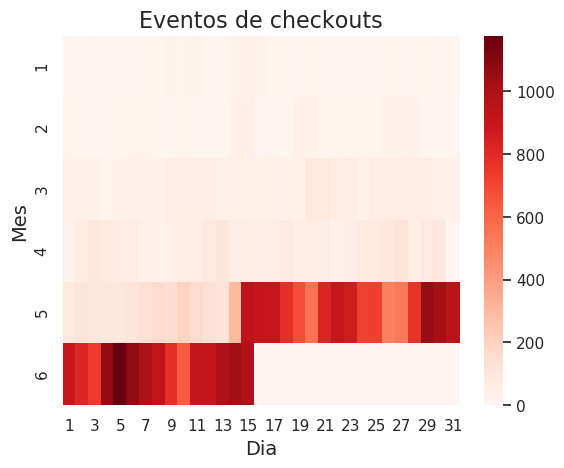

In [217]:
checkouts['day'] = checkouts['event_datetime'].dt.day
for_heatmap =  checkouts.groupby(['month','day']).size().unstack(fill_value=0)

g = sns.heatmap(for_heatmap,  cmap="Reds")
g.set_title("Eventos de checkouts", fontsize=16)
g.set_xlabel("Dia",fontsize=14)
g.set_ylabel("Mes", fontsize=14)

Luego de ver estos 2 graficos se puede concluir que las ventas y los ads hits de google  no guardan ningun tipo de relacion , mas que al igual que los otros datos, tienen baja frecuencia durante los primeros meses y luego aumenta
, pero no coinciden mucho mas que eso. La una correlacion igualmente seria dificil dada la alta diferenca entre la cantidad de datos de cada uno, ya que el rango de las ventas va hasta un maximo de 36 contra los ads hits que van hasta +1500.

Por otro lado los checkouts parecen apegarse muy bien al heatmap anterior , por lo que podriamos atribuirle el gran crecimiento de los checkouts a el mismo crecimiento en la publicidad ofrecida por google. estos datos no solo guardan correlacion en el crecimiento sino tambine en la ferecuencia, ya que se puede obserbar que ambos rangos van hasta un maximo de entre 1200-1500, por lo que reforzaria un poco mas la relacion.

### TO DO: Agregar el analsisis de ads vs ventas del notebook anterior 

asi puedo mostrar la relacion entra la cantidad de ventas y los ads hits , y la poca relacion que gaurdan

------------------
como coinciden en dias como el 5,10,26,27,3

## Correlacion ads totales vs ads que vendieron
### Obtengo las ventas que corresponden a cada campaña publicitaria

In [218]:
ads_hits = for_marketing[for_marketing['event'] == 'ad campaign hit']
ads_hits = ads_hits.dropna(axis = 1, how = 'all')

all_ads = for_marketing[for_marketing['campaign_source'].notna()]
ads_ammount = len(all_ads)

In [219]:
hits_grouped = ads_hits.groupby(['campaign_source']).count().sort_values(['timestamp'] , ascending = False).iloc[:5,:1]
hits_grouped.columns = ['eventos']

In [220]:
### Filtro por publicidades que hayan dirigido al usuario a la compra de algun producto.
### Organizo la informacion en orden que pueda ver por cada usuario, las marcas de 
### celular visitadas y a travez de que fuene de publicidad proviene.

ads_hits = ads_hits[(ads_hits['url'] != '/') & (ads_hits['url'] != '/comprar') ]
ads_hits['url'] = ads_hits['url'].str[9:]
ads_hits['url'] = ads_hits['url'].str.partition('/').iloc[:,:1]
ads_hits = ads_hits.dropna(how = 'all', axis = 1).drop(['event'],axis  =1)
ads_hits = ads_hits.rename(index=str, columns={"url": "brand"})
ads_hits = ads_hits.groupby(['person', 'brand','campaign_source']).count().iloc[:,:0]
ads_hits = ads_hits.sort_values(['person'],ascending = False)

In [221]:
### FIltro las ventas por usuario, de manera de poder ver facilmente la cantidad de productos 
### comprados por el mismo, organizados por marca.
conversions['brand'] = conversions['model'].str.partition(' ').iloc[:,:1]

ventas = conversions.drop(['event'], axis = 1)
ventas = ventas.groupby(['person','brand']).count().iloc[:,:1]
ventas.columns = ['ammount']
ventas = ventas.sort_values(['ammount'],ascending = False)

In [222]:
ads = ads_hits.reset_index()
ventas_df = ventas.reset_index()

In [223]:
### Hago un lowercase a la columna de las marcas para poder comparar correctamente contra 
### la tabla de las publicidades

ventas_df['brand'] = ventas_df['brand'].str.lower()

In [224]:
### Hago un merge de las tablas 'ventas_df' y 'ads', para relacionar las compras de cada producto por usuario
### con la entrada del mismo usuario a travez de una publicidad para comprar un producto de la misma marca.
### La idea de este analisis es saber que fuene de publicidad devuelve mejor en cuanto a las ventas.

### AVISO IMPORTANTE
### Hay que tener en cuenta que si por ej 1 usuario compro 1 samsung , pero entro previamente a travez de 
### 1 publicidad de google y criteo , ambas publicidades sobre samsung, la venta se cuenta como que fue gracias
### a ambas publicidades. Por lo tanto si sumamos la cantidad de " ventas totales por fuente de publicidad" 
### (2) va a ser mayor que "las ventas totales " (1). Lo mismo ocurre para el "porcentaje de colavoracion 
### a las ventas"

correlacion_ventas_ads = pd.merge(ventas_df, ads,  how='left', left_on=['person','brand'], right_on = ['person','brand'])

Ahora que ya tengo la cantidad de ventas correspondientes por cada 'ad hit' de cada compañia de publicidad, prosigo a filtrar los ads totales que le corresponden a cada compañia y luego mostrar ambos datos, y asi ver la correlacion entre la cantidad de publicidad y las ventas que les corresponden.

### Analisis de la correlacion

Organizo por fuentes de publicidad y con la cantidad de publicidades que terminaron que una venta, para ver cual fuente realizo la mejor devolucion.

In [225]:
ventas_totales = ventas_df['ammount'].sum()

cantidadVentasPorFuente = correlacion_ventas_ads[['campaign_source','ammount']]
cantidadVentasPorFuente = cantidadVentasPorFuente.groupby(['campaign_source']).sum().sort_values(['ammount'],ascending = False)
cantidadVentasPorFuente['%_colaboracion_a_las_ventas'] = cantidadVentasPorFuente['ammount']*100/ventas_totales
cantidadVentasPorFuente.columns = ['ads que vendieron','%_colaboracion_a_las_ventas']

Text(0,0.5,'Fuente de publicidad')

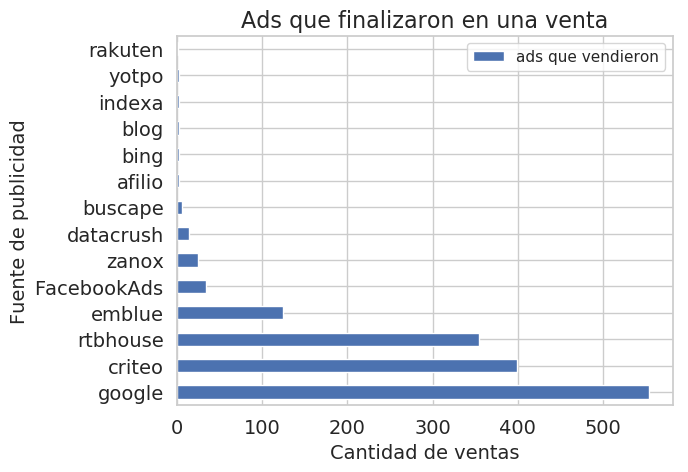

In [226]:
cantidadVentasPorFuente_graf = cantidadVentasPorFuente.iloc[:15,:1].plot.barh(fontsize = 14)

cantidadVentasPorFuente_graf.set_title("Ads que finalizaron en una venta", fontsize=16)
cantidadVentasPorFuente_graf.set_xlabel("Cantidad de ventas", fontsize=14)
cantidadVentasPorFuente_graf.set_ylabel("Fuente de publicidad", fontsize=14)

### Correlacion ads totales vs ads que vendieron

In [227]:
ads_all = all_ads.groupby(['campaign_source']).count().sort_values(['timestamp'], ascending=False).iloc[:,:1]
ads_all.columns = ['total_ads']

ventasPorFuente = cantidadVentasPorFuente.iloc[:,:1]

ads_all['vendidos'] = ventasPorFuente

In [228]:
ads_all['ads_que_vendieron'] = (ads_all['vendidos']/ads_all['total_ads'])*1000
ads_all = ads_all.dropna(subset=['ads_que_vendieron'])
ads_all['ads_totales'] = (ads_all['total_ads']/ads_ammount)*100
ads_all = ads_all.iloc[:10,2:]

Text(0,0.5,'Fuente de publicidad')

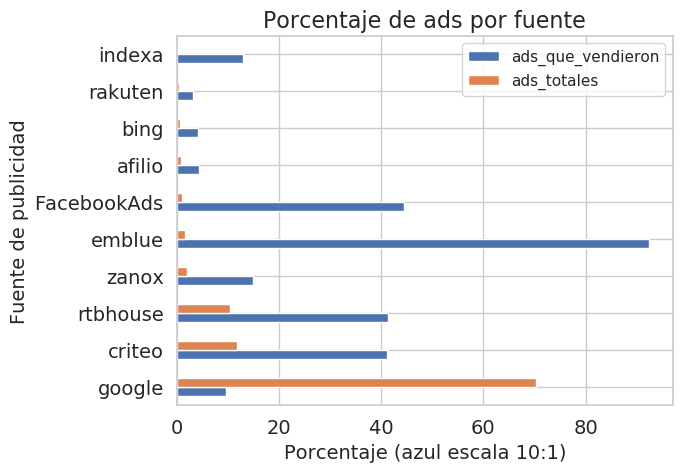

In [229]:
ads_graf = ads_all.plot.barh(fontsize=14)

ads_graf.set_title("Porcentaje de ads por fuente", fontsize=16)
ads_graf.set_xlabel("Porcentaje (azul escala 10:1)", fontsize=14)
ads_graf.set_ylabel("Fuente de publicidad", fontsize=14)

# Analisis de los productos vendidos

In [230]:
conversions = conversions.dropna(axis = 1, how = 'all')

## Ventas en relacion a cualidades del producto

Text(46.25,0.5,'Capacidad')

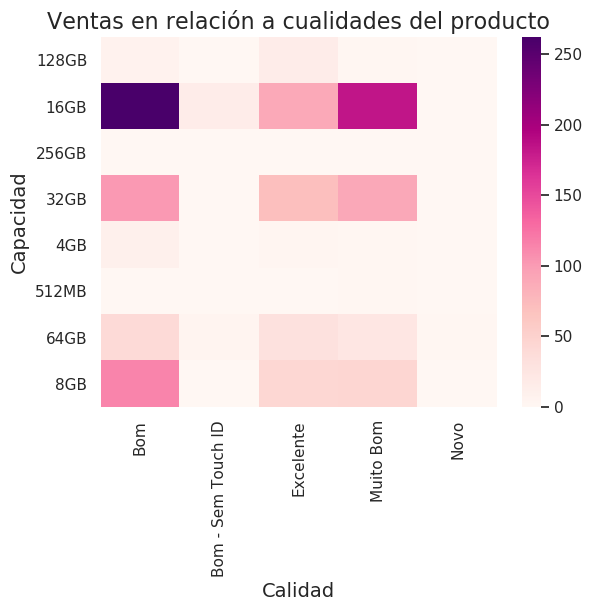

In [238]:
for_heatmap =  conversions.groupby(['storage','condition']).size().unstack(fill_value=0)

g = sns.heatmap(for_heatmap,  cmap="RdPu")
g.set_title("Ventas en relación a cualidades del producto", fontsize=16)
g.set_xlabel("Calidad",fontsize=14)
g.set_ylabel("Capacidad", fontsize=14)

En este grafico se puede ver que los productos que estan en mejor estado, 'nuevos', no tienen casi ventas realizadas durante estos 6 meses, a diferencia del que vendria a ser el opuesto, el producto de calidad mas baja, 'buen estado', es el que mas ventas colecciona entre todos, seguido por lo de calidad 'muy bueno' y 'excelente', de los cuales tambien se destaca el de calidad ' muy bueno'.
Por lo que en conjunto, las 2 mejores calidades (Excelente y Nuevo) son de las que menos ventas tienen en comparacion con productos de calidades mas bajas.
Esto se debe posiblemente a una cuestion de precio en los dispositivos, por lo que los clientes tienden a ahorrar en cuanto a la calidad pero obtienen el mismo producto, ya que de todos modos la calidad no es mala.

Algo parecido sucede con las capacidades de los dispositivos , pero no exactamente.
Ya que los productos con mayor capacidad del mercado no (64GB, 128GB y 256GB ) tienen ventas casi nulas, eso puede deberse a cuestion de precio, pero tambien puede deberse a que esta cantidad de capacidad en un dispositivo de este tipo no es de lo mas comun.
Teniendo en cuenta eso, para el resto de las capacidades no parece aplicarse el mismo criterio que se aplicaba para las calidades, ya que las ventas tambien son bajas para el extremo de las capacidades chicas como las de 512MB y 4GB ,que son las 2 menores
En cambio las ventas se concentran en dispositivos con capacidades intermedias de de entre 8 y 32GB, teniendo como punto intermedio las de 16GB que son justamente las que definitivamente sobresalen en las ventas.

# Cualidades dispositivos con checkouts

Text(46.25,0.5,'Capacidad')

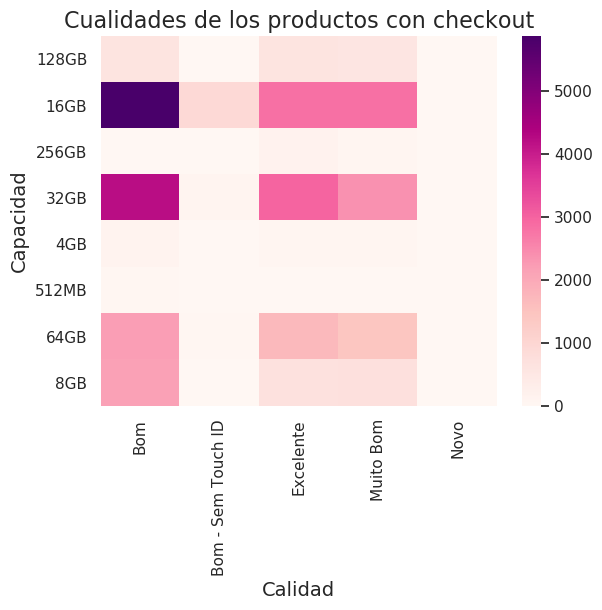

In [232]:
for_heatmap =  checkouts.groupby(['storage','condition']).size().unstack(fill_value=0)

g = sns.heatmap(for_heatmap,  cmap="RdPu")
g.set_title("Cualidades de los productos con checkout", fontsize=16)
g.set_xlabel("Calidad",fontsize=14)
g.set_ylabel("Capacidad", fontsize=14)

## Ventas en relacion a la marca

In [233]:
conversions.head()

,timestamp,event,person,model,condition,storage,event_datetime,month,day,brand
220,2018-03-20 17:46:12,conversion,00204059,Motorola Moto X2,Muito Bom,32GB,2018-03-20 17:46:12,3,20,Motorola
2282,2018-04-26 22:28:53,conversion,00c13dee,Samsung Galaxy Core Plus Duos TV,Muito Bom,4GB,2018-04-26 22:28:53,4,26,Samsung
2547,2018-06-10 14:37:50,conversion,00fdbb4b,Samsung Galaxy S6 Flat,Muito Bom,32GB,2018-06-10 14:37:50,6,10,Samsung
4245,2018-03-16 13:50:25,conversion,0146a9df,iPhone 5s,Bom,32GB,2018-03-16 13:50:25,3,16,iPhone
6985,2018-02-09 22:07:07,conversion,01db2fe6,Samsung Galaxy J5,Bom,16GB,2018-02-09 22:07:07,2,9,Samsung


Text(46.25,0.5,'Marca')

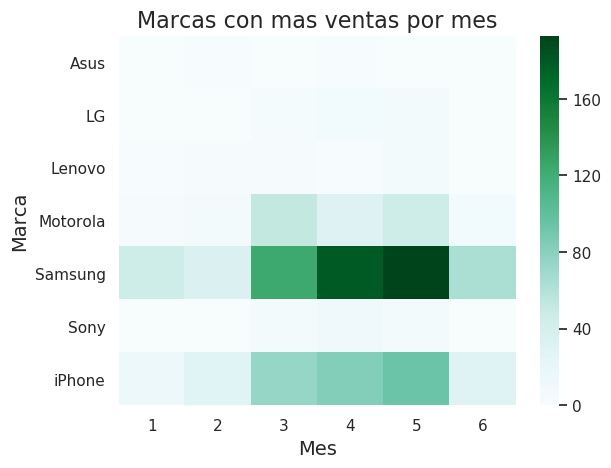

In [234]:
for_heatmap =  conversions.groupby(['brand','month']).size().unstack(fill_value=0)

g = sns.heatmap(for_heatmap,  cmap="BuGn")
g.set_title("Marcas con mas ventas por mes", fontsize=16)
g.set_xlabel("Mes",fontsize=14)
g.set_ylabel("Marca", fontsize=14)

# Analisis de los OS  mediante los que se accedio

In [235]:
os = eventos_2018[eventos_2018['operating_system_version'].notna()]
os['main_os'] = os['operating_system_version'].str.partition(' ').iloc[:,:1]

Text(46.25,0.5,'OS')

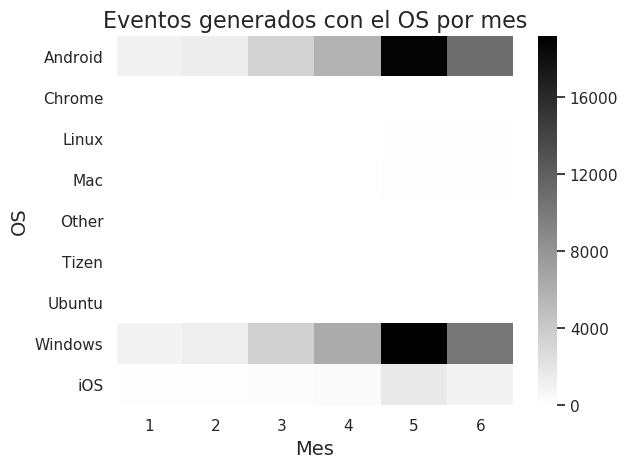

In [236]:
for_heatmap =  os.groupby(['main_os','month']).size().unstack(fill_value=0)

g = sns.heatmap(for_heatmap,  cmap="binary")
g.set_title("Eventos generados con el OS por mes", fontsize=16)
g.set_xlabel("Mes",fontsize=14)
g.set_ylabel("OS", fontsize=14)

# Codigo de la primera entrega (copy past + alguna modificacion)

Text(0,0.5,'Modelo')

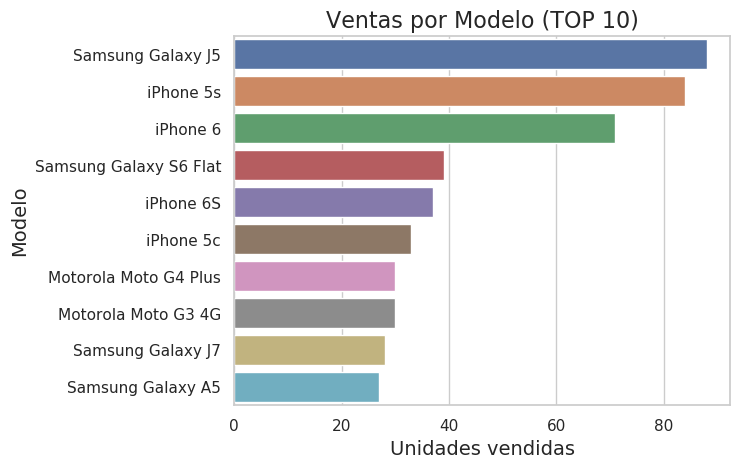

In [237]:
venta_modelos = conversions['model'].value_counts().iloc[:10]

models_graf = sns.barplot(x=venta_modelos.values, y=venta_modelos.index)
models_graf.set_title("Ventas por Modelo (TOP 10)", fontsize=16)
models_graf.set_xlabel("Unidades vendidas", fontsize=14)
models_graf.set_ylabel("Modelo", fontsize=14)